# Intro a ML

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_de_datos = '/content/drive/MyDrive/Databases/Week 16/ecomm_users_db.txt'

In [ ]:
X = []

with open(base_de_datos,'r') as f:
  for line in f.readlines():
    data = line.split('\t')
    X.append(data)
X= np.array(X)    

In [ ]:
X

array([['age', 'workclass', 'annual_income', ..., 'agility_on_buying',
        'frequency_on_buying', 'interface_to_show\n'],
       ['25', ' Private', '148471', ..., '1.77', '2.67', '0\n'],
       ['39', ' Private', '145544', ..., '3.72', '4.03', '1\n'],
       ...,
       ['51', ' ?', '52167', ..., '5.18', '5.09', '1\n'],
       ['25', ' Private', '52140', ..., '5.58', '1.28', '2\n'],
       ['23', ' Private', '52078', ..., '8.81', '2.68', '3\n']],
      dtype='<U24')

In [ ]:
df = pd.DataFrame(X, columns=['age', 'workclass', 'annual_income', 'education', 'usr_credit_lvl',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_losses', 'hours_per_week', 'native_country',
       'income', 'churn','fraud_score','payment_score','credit_accepted','score_money_spent_banks','score_user_banks','user_level_third_parties','agility_on_buying',
       'frequency_on_buying','interface_to_show'])
df.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
0,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show\n
1,25,Private,148471,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,1,4.86,4.87,0,5.88,6.2,0,1.77,2.67,0\n
2,39,Private,145544,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,4.69,5.37,0,5.7,3.59,1,3.72,4.03,1\n
3,45,Private,136612,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,1,3.82,5.71,0,3.42,4.47,2,6.66,2.89,2\n
4,29,Private,126834,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,1,2.58,9.88,1,7.55,7.67,0,8.51,1.98,3\n


In [ ]:
df = df.iloc[1:]

In [ ]:
df.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
1,25,Private,148471,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,1,4.86,4.87,0,5.88,6.2,0,1.77,2.67,0\n
2,39,Private,145544,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,4.69,5.37,0,5.7,3.59,1,3.72,4.03,1\n
3,45,Private,136612,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,1,3.82,5.71,0,3.42,4.47,2,6.66,2.89,2\n
4,29,Private,126834,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,1,2.58,9.88,1,7.55,7.67,0,8.51,1.98,3\n
5,35,Private,122658,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,0,8.3,5.36,1,7.16,2.65,1,0.53,2.98,0\n


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 1 to 293
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       293 non-null    object
 1   workclass                 293 non-null    object
 2   annual_income             293 non-null    object
 3   education                 293 non-null    object
 4   usr_credit_lvl            293 non-null    object
 5   marital-status            293 non-null    object
 6   occupation                293 non-null    object
 7   relationship              293 non-null    object
 8   race                      293 non-null    object
 9   sex                       293 non-null    object
 10  capital_gain              293 non-null    object
 11  capital_losses            293 non-null    object
 12  hours_per_week            293 non-null    object
 13  native_country            293 non-null    object
 14  income                    

In [ ]:
df = df.astype({'annual_income':'int32'})

In [ ]:
df.info()

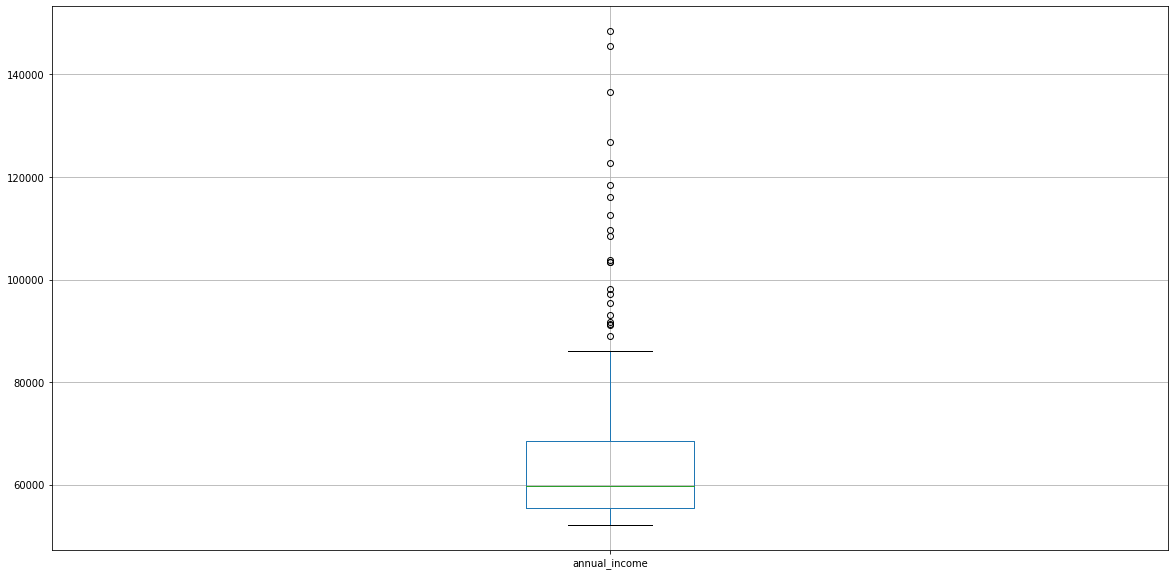

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df.boxplot(column=['annual_income'])

In [ ]:
q1,q3 = np.percentile(df['annual_income'],[25,75],axis=0)
iqr = q3-q1
upper = q3+(1.5*iqr)

df_clean = df.loc[df['annual_income']<upper].copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 22 to 293
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       272 non-null    object
 1   workclass                 272 non-null    object
 2   annual_income             272 non-null    int32 
 3   education                 272 non-null    object
 4   usr_credit_lvl            272 non-null    object
 5   marital-status            272 non-null    object
 6   occupation                272 non-null    object
 7   relationship              272 non-null    object
 8   race                      272 non-null    object
 9   sex                       272 non-null    object
 10  capital_gain              272 non-null    object
 11  capital_losses            272 non-null    object
 12  hours_per_week            272 non-null    object
 13  native_country            272 non-null    object
 14  income                   

## Logistic Regression
Mientras que la regresión lineal se usa para predecir una variable numérica, la regresión logística se usa para la clasificación. 
La logística se utiliza para explicar una relación entre las variables predictoras y una (s) variable (s) de respuesta que pueden tomar valores de 0 o 1. 

La regresión logística no necesita satisfacer los mismos supuestos que la regresión lineal. Los únicos supuestos que debemos satisfacer son
* que las variables predictoras son independientes entre sí y no están correlacionadas entre sí. 
* También necesitamos que la variable de respuesta sea binaria (es decir, que tenga solo dos valores posibles) 

In [ ]:
df.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
1,25,Private,148471,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,1,4.86,4.87,0,5.88,6.2,0,1.77,2.67,0\n
2,39,Private,145544,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,4.69,5.37,0,5.7,3.59,1,3.72,4.03,1\n
3,45,Private,136612,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,1,3.82,5.71,0,3.42,4.47,2,6.66,2.89,2\n
4,29,Private,126834,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,1,2.58,9.88,1,7.55,7.67,0,8.51,1.98,3\n
5,35,Private,122658,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,0,8.3,5.36,1,7.16,2.65,1,0.53,2.98,0\n


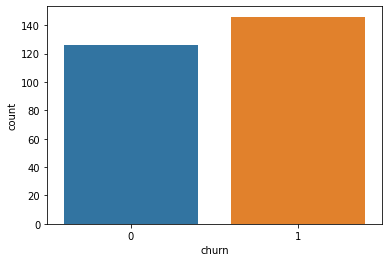

In [ ]:
import seaborn as sns
sns.countplot(x='churn', data= df_clean)

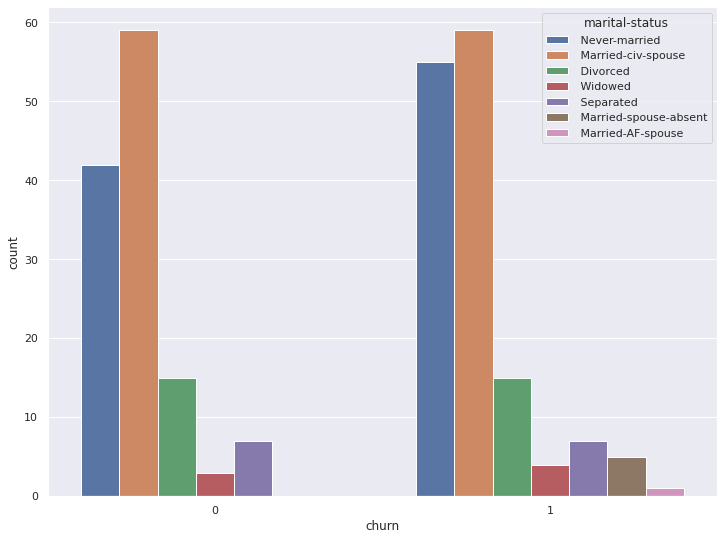

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='churn',hue='marital-status',data=df_clean)

In [ ]:
df_clean = df_clean[df_clean['workclass']!=' ?']

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 23 to 293
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       258 non-null    object
 1   workclass                 258 non-null    object
 2   annual_income             258 non-null    int32 
 3   education                 258 non-null    object
 4   usr_credit_lvl            258 non-null    object
 5   marital-status            258 non-null    object
 6   occupation                258 non-null    object
 7   relationship              258 non-null    object
 8   race                      258 non-null    object
 9   sex                       258 non-null    object
 10  capital_gain              258 non-null    object
 11  capital_losses            258 non-null    object
 12  hours_per_week            258 non-null    object
 13  native_country            258 non-null    object
 14  income                   

In [ ]:
df_clean.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
23,32,Private,85753,HS-grad,9,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,8.9,4.67,1,7.85,1.74,1,6.04,1.29,2\n
24,33,Private,85753,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,40,United-States,<=50K,0,2.53,2.63,1,2.83,2.06,2,7.47,3.96,3\n
25,34,Private,84986,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Nicaragua,<=50K,1,5.56,4.9,0,3.88,4.2,0,2.33,3.27,0\n
26,54,Private,81675,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2051,40,United-States,<=50K,0,3.79,5.27,0,7.58,0.61,1,5.93,6.3,1\n
27,38,Private,80959,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,1,5.45,4.65,0,5.38,4.21,2,4.36,0.34,2\n


In [ ]:
df_clean = df_clean.sample(frac=1)

In [ ]:
df_clean.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
197,46,Private,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,60,United-States,>50K,0,3.18,1.51,1,4.67,5.67,0,0.74,2.38,0\n
249,47,Local-gov,54316,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K,1,2.79,9.68,1,2.76,0.21,2,4.55,1.54,2\n
220,27,State-gov,55347,Bachelors,13,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,48,United-States,<=50K,0,8.29,6.11,1,3.81,2.9,2,0.37,4.48,0\n
86,23,Private,66467,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K,1,5.44,6.27,0,4.69,2.87,0,4.14,6.78,1\n
143,41,Private,59963,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,>50K,0,8.17,5.8,1,5.06,8.09,0,3.6,1.69,2\n


In [ ]:
df_clean_dummies = pd.get_dummies(df_clean, columns=['marital-status','sex'])
df_clean_dummies.head()

,age,workclass,annual_income,education,usr_credit_lvl,occupation,relationship,race,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,sex_ Female,sex_ Male
197,46,Private,56388,HS-grad,9,Craft-repair,Husband,Black,0,0,60,United-States,>50K,0,3.18,1.51,1,4.67,5.67,0,0.74,2.38,0\n,0,0,1,0,0,0,0,0,1
249,47,Local-gov,54316,HS-grad,9,Adm-clerical,Unmarried,Black,0,0,40,United-States,<=50K,1,2.79,9.68,1,2.76,0.21,2,4.55,1.54,2\n,0,0,0,0,0,1,0,1,0
220,27,State-gov,55347,Bachelors,13,Protective-serv,Wife,Black,0,0,48,United-States,<=50K,0,8.29,6.11,1,3.81,2.9,2,0.37,4.48,0\n,0,0,1,0,0,0,0,1,0
86,23,Private,66467,HS-grad,9,Craft-repair,Own-child,Black,0,0,40,United-States,<=50K,1,5.44,6.27,0,4.69,2.87,0,4.14,6.78,1\n,0,0,0,0,1,0,0,0,1
143,41,Private,59963,Some-college,10,Adm-clerical,Wife,Black,0,0,40,United-States,>50K,0,8.17,5.8,1,5.06,8.09,0,3.6,1.69,2\n,0,0,1,0,0,0,0,1,0


In [ ]:
df_clean_dummies.info()

In [ ]:
df_clean_dummies = df_clean_dummies.astype({'churn':'int32'})
df_num= df_clean_dummies._get_numeric_data()

In [ ]:
df_num.head()

,annual_income,churn,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,sex_ Female,sex_ Male
197,56388,0,0,0,1,0,0,0,0,0,1
249,54316,1,0,0,0,0,0,1,0,1,0
220,55347,0,0,0,1,0,0,0,0,1,0
86,66467,1,0,0,0,0,1,0,0,0,1
143,59963,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

x_columns = [col for col in df_num.columns.values if col!= 'churn']
x_columns

['annual_income',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'sex_ Female',
 'sex_ Male']

In [ ]:
df_X = df_num[x_columns]
df_y = df_num['churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.25, random_state = 101)

In [ ]:
churn_model = LogisticRegression(solver='liblinear')
churn_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = churn_model.predict(X_test)
df_predicted = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_predicted

,Actual,Predicted
117,1,1
269,0,1
25,1,1
239,0,1
267,1,1
...,...,...
174,1,1
280,1,1
260,0,1
127,1,1


In [ ]:
churn_model.score(X_train,y_train)

0.538860103626943

In [ ]:
churn_model.coef_

array([[ 3.77710052e-06,  1.50024852e-11,  5.26186322e-12,
        -6.41292356e-11,  1.04936982e-11,  5.37158026e-11,
        -8.30994337e-12,  9.74751012e-12,  1.57115253e-11,
         6.07065507e-12]])



#Clasificación Supervisada
- DecisionTreeClassifier (Arbol)
- RandomForestClassifier (Arbol)
- ExtraTreesClassifier (Arbol)
- OneVsOneClassifier (SVM)
- KNeighborsClassifier (K-Nearest Neighbors (KNN))



In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Arboles
**Bagging**
(Bootstrap aggregation) Permite seleccionar de neustro mismos dataset diferentes subsets para entrenar neustro algoritmo. Ayuda a prevenir el Overfitting y mejora la estabilidad de neustros algoritmos a tener en cuenta diferentes muestras que contienen datos similares con reemplazo

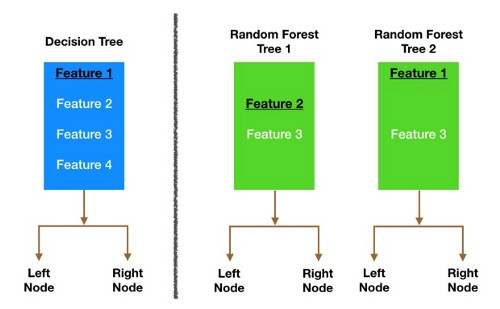

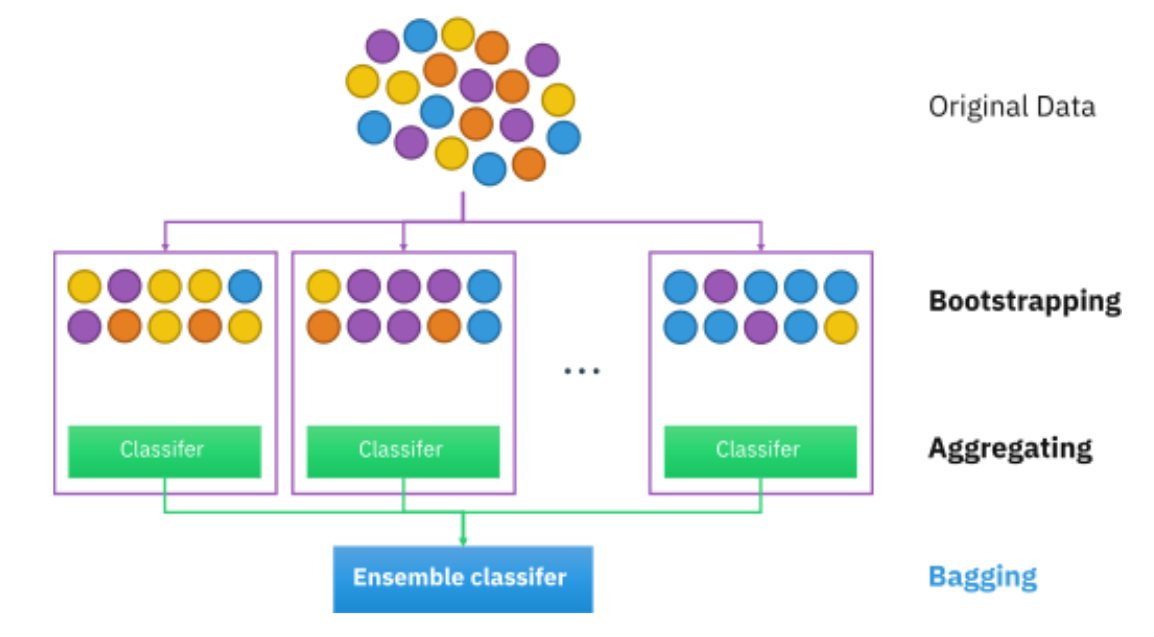

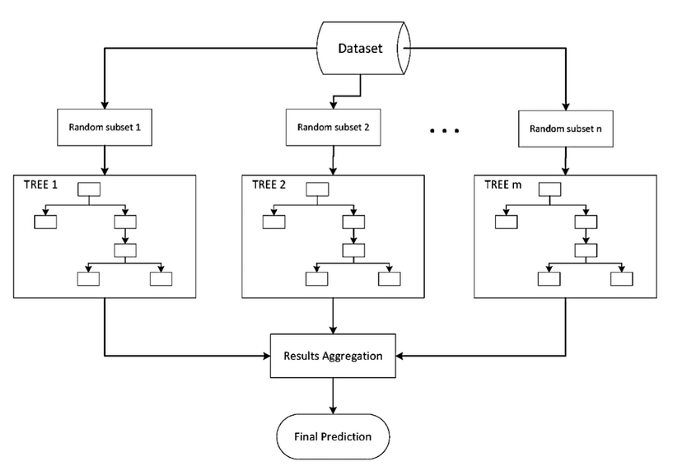

## Arbol de decisión

Pros

* Los árboles de decisión son fáciles de interpretar y visualizar.
* Puede capturar fácilmente patrones no lineales.
* Requiere menos procesamiento previo de datos por parte del usuario, por ejemplo, no hay necesidad de normalizar columnas.
* Se puede utilizar para la feature engineering, como la predicción de valores perdidos, adecuado para la selección de variables.
* El árbol de decisión no tiene supuestos sobre la distribución debido a la naturaleza no paramétrica del algoritmo.

Contras

* Sensible a datos ruidosos. Puede sobreajustarse a datos ruidosos.
* La pequeña variación (o varianza) en los datos puede resultar en un árbol de decisión diferente. Esto se puede reducir mediante algoritmos de embolsado y refuerzo.
* Los árboles de decisión están sesgados con el conjunto de datos de desequilibrio, por lo que se recomienda equilibrar el conjunto de datos antes de crear el árbol de decisión.

In [ ]:
df_clean.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
197,46,Private,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,60,United-States,>50K,0,3.18,1.51,1,4.67,5.67,0,0.74,2.38,0\n
249,47,Local-gov,54316,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K,1,2.79,9.68,1,2.76,0.21,2,4.55,1.54,2\n
220,27,State-gov,55347,Bachelors,13,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,48,United-States,<=50K,0,8.29,6.11,1,3.81,2.9,2,0.37,4.48,0\n
86,23,Private,66467,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K,1,5.44,6.27,0,4.69,2.87,0,4.14,6.78,1\n
143,41,Private,59963,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,>50K,0,8.17,5.8,1,5.06,8.09,0,3.6,1.69,2\n


In [ ]:
df_credit = df_clean[['fraud_score','payment_score','credit_accepted']]
df_credit.head()

,fraud_score,payment_score,credit_accepted
197,3.18,1.51,1
249,2.79,9.68,1
220,8.29,6.11,1
86,5.44,6.27,0
143,8.17,5.8,1


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 197 to 30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fraud_score      258 non-null    object
 1   payment_score    258 non-null    object
 2   credit_accepted  258 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [ ]:
df_credit = df_credit.astype({'fraud_score':'float','payment_score':'float','credit_accepted':'int32'})

In [ ]:
#seprarar las clases/etiquetas
class_0 = df_credit[(df_credit['credit_accepted']==0)].to_numpy()
class_1 = df_credit[(df_credit['credit_accepted']==1)].to_numpy()

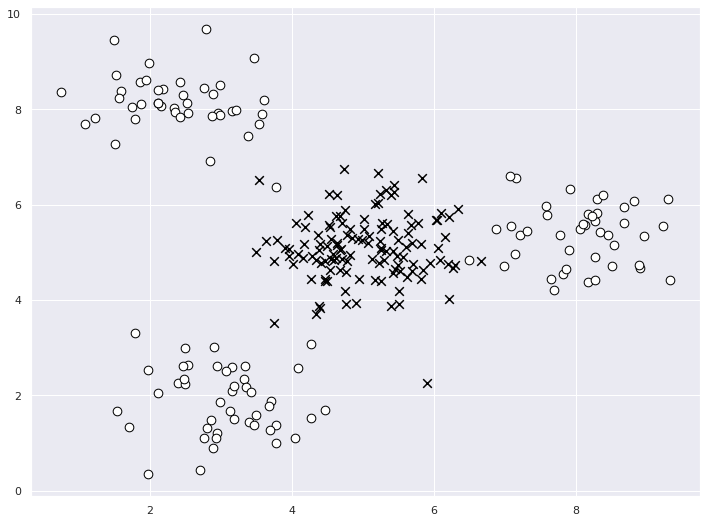

In [ ]:
fig = plt.figure(facecolor = 'w')
plt.scatter(class_0[:,0],class_0[:,1],s =75, facecolor ='black', edgecolors ='black', marker='x')
plt.scatter(class_1[:,0],class_1[:,1],s =75, facecolor ='white', edgecolors ='black', marker='o')


In [ ]:
X = df_credit.drop(columns='credit_accepted').to_numpy()
y= df_credit['credit_accepted']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = .25, random_state = 101)

In [ ]:
classifier = DecisionTreeClassifier( random_state=0, max_depth=4)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
def visualize_classifier(classifier, X, y, title=''):
  #obteniendo nuestro min y max para el arange
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # paso que tomara nuestro grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and Y values
    #manera automatica de crear un grid para nuestro rango de datos
    #x_vals convierte nustro arreglo de 2D en uno de 1D,
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Ejecutando neustro modelo para los valores
    #Ravel permite convertir el arerglo a 1 D
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Cambiamos el tamoño de nuestro output 
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Specify the title
    plt.title(title)
    
    # Creamos el color de nustra grafica. Practicamente es estar mapeando los limites de donde a donde
    #va a colorear y los colores o escalara de colores la determinamos en cmap
    # Colores secuenciales, divergentes, etc...
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.hot)
    
    # Crea un scatterplot con cada valor de X y y, color del marker
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Especigicamos de donde a donde va nuestro plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Especificamos marcador en nuestro eje x y y.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    
    plt.show()

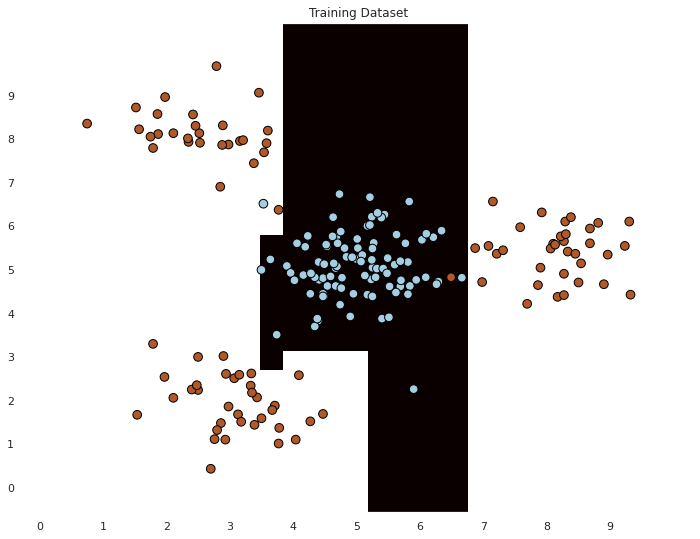

In [ ]:
visualize_classifier(classifier,X_train, y_train, 'Training Dataset')

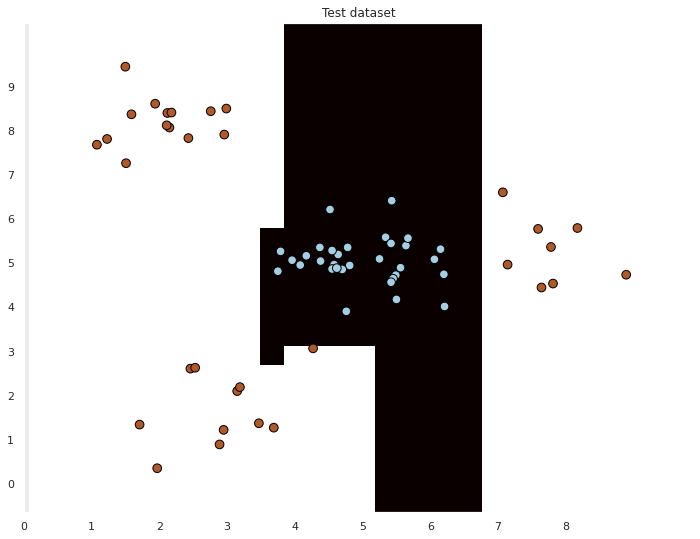

In [ ]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test,y_test, 'Test dataset')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


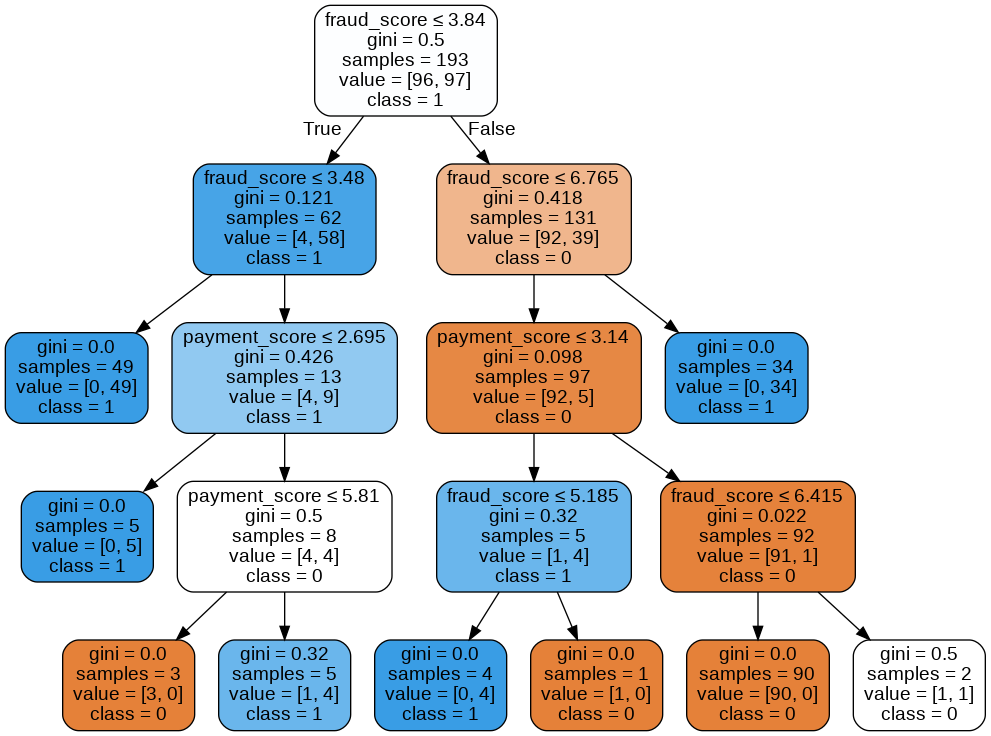

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['fraud_score','payment_score'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[32,  0],
       [ 0, 33]])

In [ ]:
class_names = ['1', '0']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        96
           0       0.99      0.99      0.99        97

    accuracy                           0.99       193
   macro avg       0.99      0.99      0.99       193
weighted avg       0.99      0.99      0.99       193

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           0       1.00      1.00      1.00        33

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

########################################



1.0

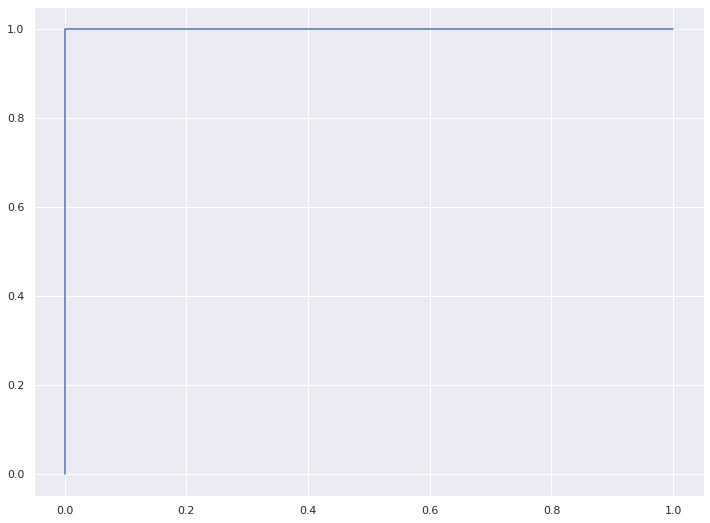

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr)
auc

##Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
df_clean.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
197,46,Private,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,60,United-States,>50K,0,3.18,1.51,1,4.67,5.67,0,0.74,2.38,0\n
249,47,Local-gov,54316,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K,1,2.79,9.68,1,2.76,0.21,2,4.55,1.54,2\n
220,27,State-gov,55347,Bachelors,13,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,48,United-States,<=50K,0,8.29,6.11,1,3.81,2.9,2,0.37,4.48,0\n
86,23,Private,66467,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K,1,5.44,6.27,0,4.69,2.87,0,4.14,6.78,1\n
143,41,Private,59963,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,>50K,0,8.17,5.8,1,5.06,8.09,0,3.6,1.69,2\n


In [ ]:
df_third_parties = df_clean[['score_money_spent_banks','score_user_banks','user_level_third_parties']]
df_third_parties.head()

,score_money_spent_banks,score_user_banks,user_level_third_parties
197,4.67,5.67,0
249,2.76,0.21,2
220,3.81,2.9,2
86,4.69,2.87,0
143,5.06,8.09,0


In [ ]:
df_third_parties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 197 to 30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   score_money_spent_banks   258 non-null    object
 1   score_user_banks          258 non-null    object
 2   user_level_third_parties  258 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [ ]:
df_third_parties = df_third_parties.astype({'score_money_spent_banks':'float','score_user_banks':'float','user_level_third_parties':'int32'})
df_third_parties.info()
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 197 to 30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   score_money_spent_banks   258 non-null    float64
 1   score_user_banks          258 non-null    float64
 2   user_level_third_parties  258 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 7.1 KB


In [ ]:
class_0 = df_third_parties[(df_third_parties['user_level_third_parties']==0)].to_numpy()
class_1 = df_third_parties[(df_third_parties['user_level_third_parties']==1)].to_numpy()
class_2 = df_third_parties[(df_third_parties['user_level_third_parties']==2)].to_numpy()

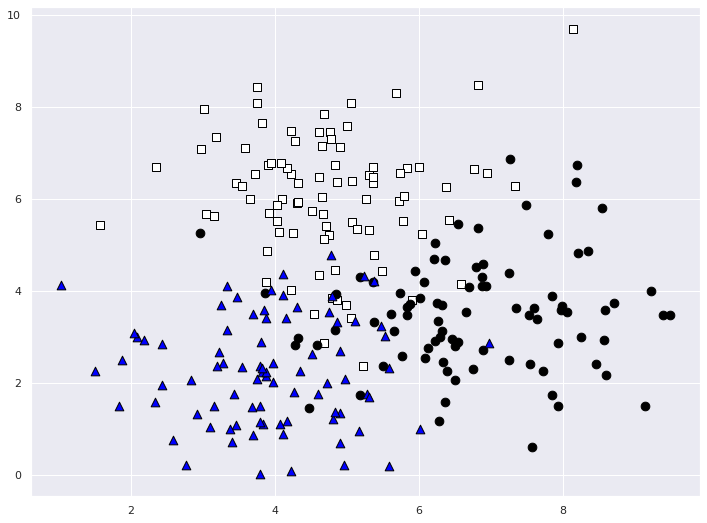

In [ ]:
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],s=75,facecolor='white', edgecolors ='black',marker='s')
plt.scatter(class_1[:,0],class_1[:,1],s=75,facecolor='black', edgecolors ='black',marker='o')
plt.scatter(class_2[:,0],class_2[:,1],s=75,facecolor='blue', edgecolors ='black',marker='^')

In [ ]:
X = df_third_parties.drop(columns='user_level_third_parties').to_numpy()
y = df_third_parties['user_level_third_parties']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
classifier_random = RandomForestClassifier(n_estimators=100,max_depth=4,random_state = 0)

In [ ]:
classifier_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

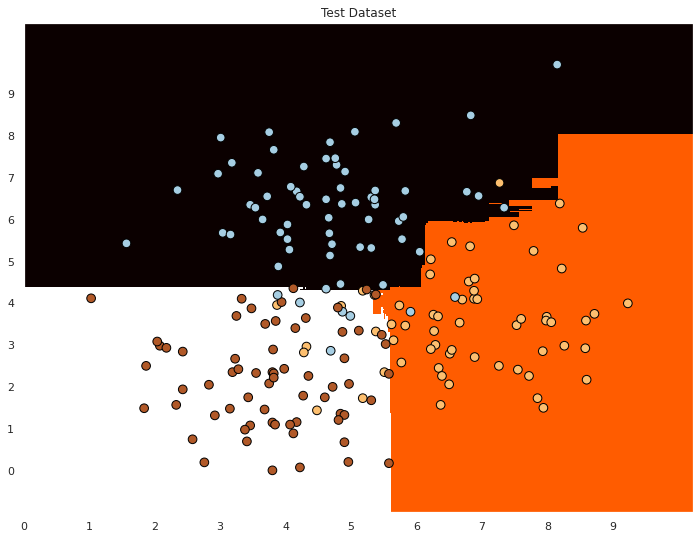

In [ ]:
y_test_pred = classifier_random.predict(X_test)
visualize_classifier(classifier_random,X_train, y_train, 'Test Dataset')
# Azul es 0, naranja es 1, rojo es 2

In [ ]:
class_names = ['Class-0','Class-1','Class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier_random.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.98      0.89      0.94        66
     Class-1       0.94      0.84      0.89        61
     Class-2       0.82      0.98      0.90        66

    accuracy                           0.91       193
   macro avg       0.92      0.90      0.91       193
weighted avg       0.92      0.91      0.91       193

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.85      0.77      0.81        22
     Class-1       0.88      0.85      0.86        26
     Class-2       0.70      0.82      0.76        17

    accuracy                           0.82        65
   macro avg       0.81      0.81      0.81        65
weighted avg       0.82      0.82      0.82        65

###########################

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[17,  1,  4],
       [ 2, 22,  2],
       [ 1,  2, 14]])

In [ ]:
test_datapoints = np.array([[5,5],[3,6],[6,4],[7,2],[4,4],[5,2]])
for datapoint in test_datapoints:
  probabilities = classifier_random.predict_proba([datapoint])[0]
  predicted_class = 'Class - ' + str(np.argmax(probabilities))
  print( '\n Datapoint:', datapoint)
  print('Predicted Class:',predicted_class)



 Datapoint: [5 5]
Predicted Class: Class - 0

 Datapoint: [3 6]
Predicted Class: Class - 0

 Datapoint: [6 4]
Predicted Class: Class - 1

 Datapoint: [7 2]
Predicted Class: Class - 1

 Datapoint: [4 4]
Predicted Class: Class - 2

 Datapoint: [5 2]
Predicted Class: Class - 2


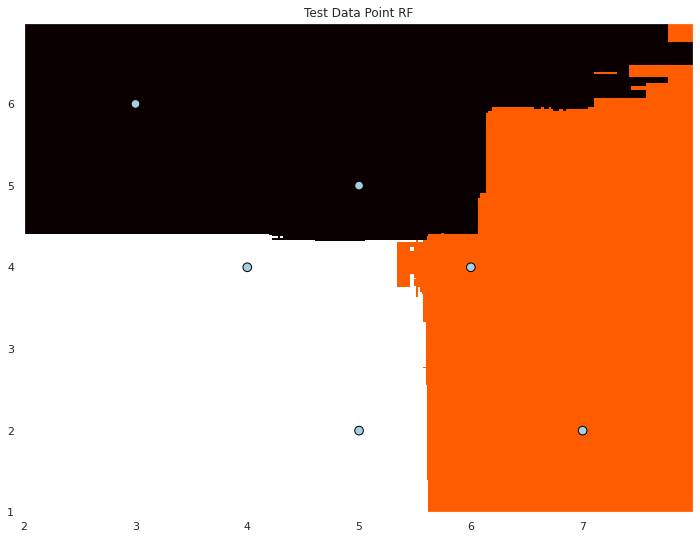

In [ ]:
visualize_classifier(classifier_random, test_datapoints,[0]*len(test_datapoints), 'Test Data Point RF')

In [ ]:
classifier_random.feature_importances_

array([0.47143595, 0.52856405])

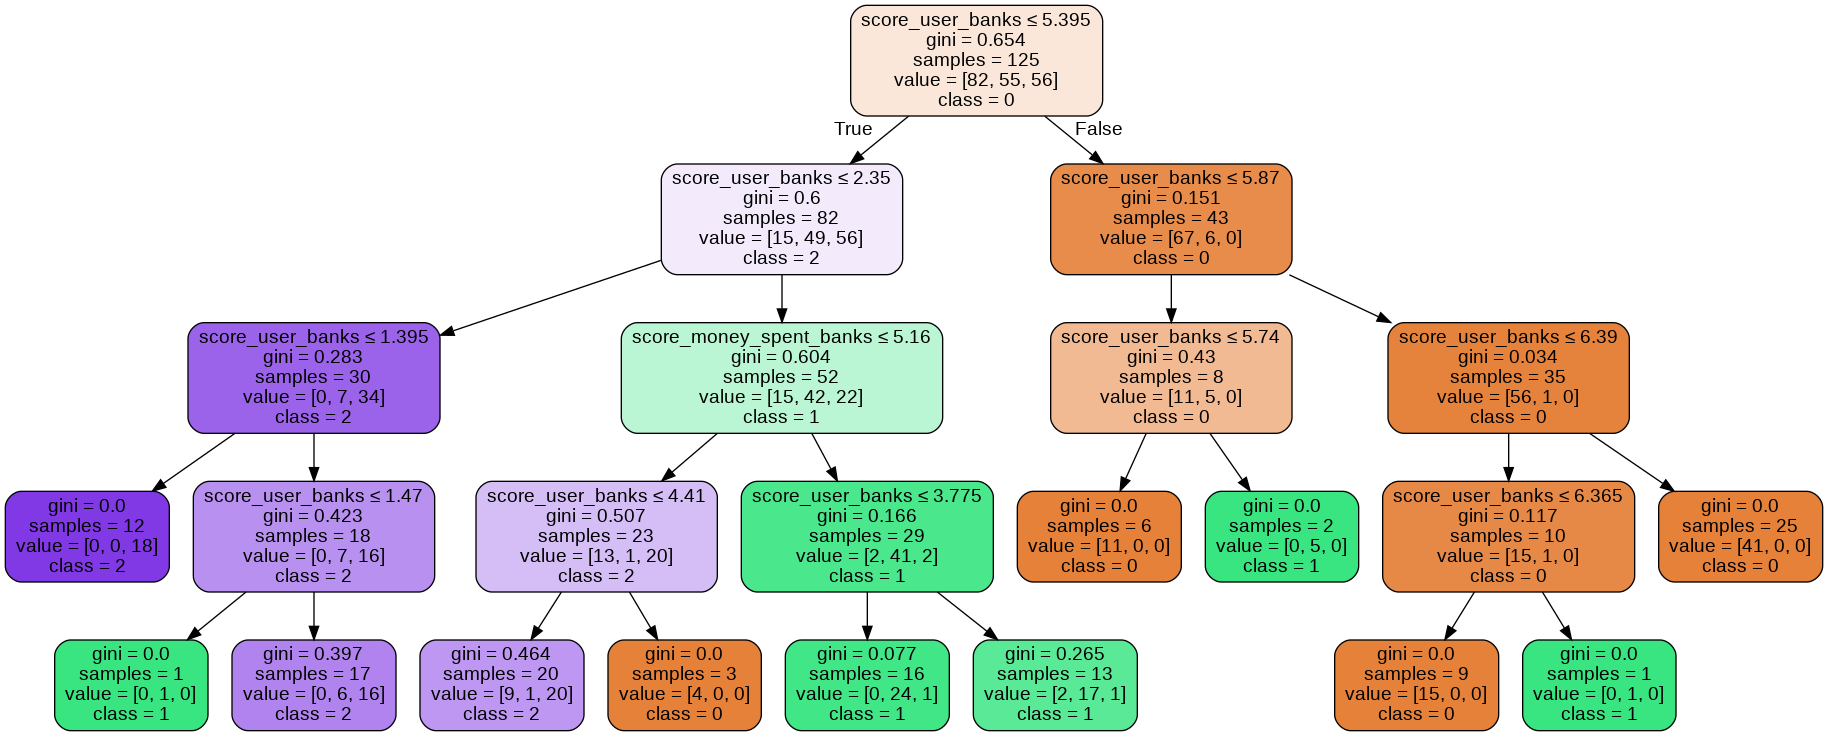

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier_random.estimators_[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['score_money_spent_banks','score_user_banks'],class_names=['0','1','2']) 
          
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

##Extra Trees Classifier



In [ ]:
classifier_extra = ExtraTreesClassifier(n_estimators=100, max_depth=4)
classifier_extra.fit(X_train,y_train)
y_test_pred = classifier_extra.predict(X_test)

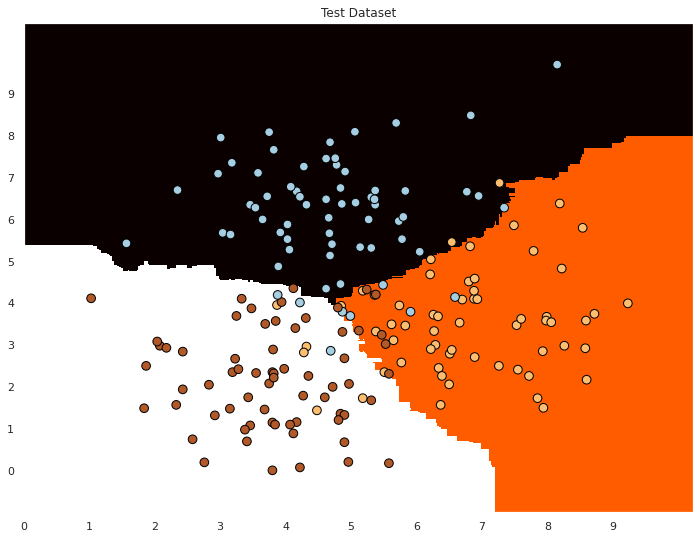

In [ ]:
visualize_classifier(classifier_extra,X_train, y_train, 'Test Dataset Extra')

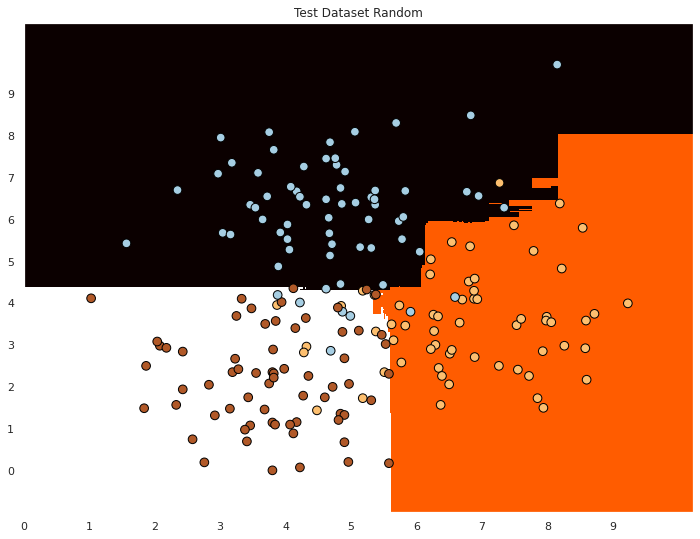

In [ ]:
visualize_classifier(classifier_random,X_train, y_train, 'Test Dataset Random')


In [ ]:
class_names = ['Class-0','Class-1','Class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier_extra.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.97      0.86      0.91        66
     Class-1       0.84      0.85      0.85        61
     Class-2       0.85      0.92      0.88        66

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.89      0.88      0.88       193

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.90      0.82      0.86        22
     Class-1       0.92      0.85      0.88        26
     Class-2       0.71      0.88      0.79        17

    accuracy                           0.85        65
   macro avg       0.84      0.85      0.84        65
weighted avg       0.86      0.85      0.85        65

###########################

In [ ]:
class_names = ['Class-0','Class-1','Class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier_random.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.98      0.89      0.94        66
     Class-1       0.94      0.84      0.89        61
     Class-2       0.82      0.98      0.90        66

    accuracy                           0.91       193
   macro avg       0.92      0.90      0.91       193
weighted avg       0.92      0.91      0.91       193

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.85      0.77      0.81        22
     Class-1       0.88      0.85      0.86        26
     Class-2       0.70      0.82      0.76        17

    accuracy                           0.82        65
   macro avg       0.81      0.81      0.81        65
weighted avg       0.82      0.82      0.82        65

###########################

In [ ]:
classifier_random.feature_importances_

array([0.47143595, 0.52856405])

In [ ]:
classifier_extra.feature_importances_

array([0.41131416, 0.58868584])

##SVM

Las Máquinas de Vectores de Soporte (Support Vector Machines) permiten encontrar la forma óptima de clasificar entre varias clases. La clasificación óptima se realiza maximizando el margen de separación entre las clases. 

Este margen siempre se intenta que sea el maximo para que no se calsifique incorercamtente

Los vectores que definen el borde de esta separación son los vectores de soporte. En el caso de que las clases no sean linealmente separables, podemos usar el truco del kernel para añadir una dimensión nueva donde sí lo sean.

Uso de SVM:

* reconocimiento óptico de caracteres
* detección de caras para que las cámaras digitales enfoquen correctamente
* filtros de spam para correo electrónico
* reconocimiento de imágenes a bordo de satélites (saber qué partes de una imagen tienen nubes, tierra, agua, hielo, etc.)
* Actualmente, las redes neuronales profundas tienen una mayor capacidad de aprendizaje y generalización que los SVM.


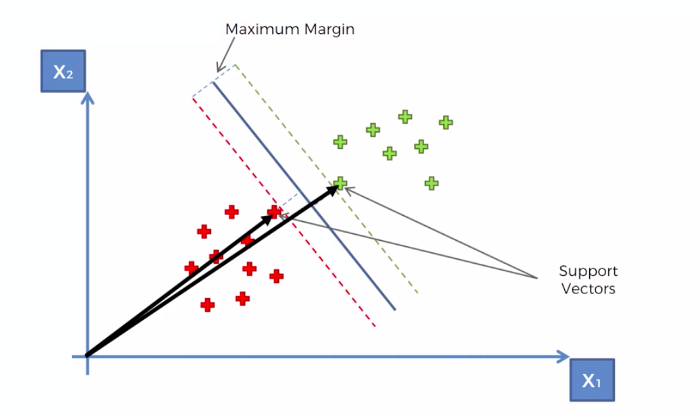

In [ ]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
df_clean.head()

,age,workclass,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,race,sex,capital_gain,capital_losses,hours_per_week,native_country,income,churn,fraud_score,payment_score,credit_accepted,score_money_spent_banks,score_user_banks,user_level_third_parties,agility_on_buying,frequency_on_buying,interface_to_show
197,46,Private,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,60,United-States,>50K,0,3.18,1.51,1,4.67,5.67,0,0.74,2.38,0\n
249,47,Local-gov,54316,HS-grad,9,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K,1,2.79,9.68,1,2.76,0.21,2,4.55,1.54,2\n
220,27,State-gov,55347,Bachelors,13,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,48,United-States,<=50K,0,8.29,6.11,1,3.81,2.9,2,0.37,4.48,0\n
86,23,Private,66467,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K,1,5.44,6.27,0,4.69,2.87,0,4.14,6.78,1\n
143,41,Private,59963,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,>50K,0,8.17,5.8,1,5.06,8.09,0,3.6,1.69,2\n


In [ ]:
df_svm = df_clean[['age','annual_income','education','usr_credit_lvl','marital-status','occupation','relationship','capital_gain','capital_losses','hours_per_week','native_country','income']]

In [ ]:
df_svm.head()

,age,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,capital_gain,capital_losses,hours_per_week,native_country,income
197,46,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,0,0,60,United-States,>50K
249,47,54316,HS-grad,9,Separated,Adm-clerical,Unmarried,0,0,40,United-States,<=50K
220,27,55347,Bachelors,13,Married-civ-spouse,Protective-serv,Wife,0,0,48,United-States,<=50K
86,23,66467,HS-grad,9,Never-married,Craft-repair,Own-child,0,0,40,United-States,<=50K
143,41,59963,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,0,0,40,United-States,>50K


In [ ]:
label_encoder =[]
df_svm_np = df_svm.to_numpy()

X_encoded = np.empty(df_svm_np.shape)

for i, item in enumerate(df_svm_np[0]):
  if str(item).isdigit():
    X_encoded[:,i] = df_svm_np[:,i]
  else:
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:,i] = label_encoder[-1].fit_transform(df_svm_np[:, i])


In [ ]:
X = X_encoded[:,:-1].astype(int)
y = X_encoded[:,-1].astype(int)

In [ ]:
X[0]

array([   46, 56388,    11,     9,     2,     1,     0,     0,     0,
          60,    12])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2)

In [ ]:
classifier = OneVsOneClassifier(LinearSVC())
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   n_jobs=None)

## KFold Cross validation
1. Considere el grupo como un conjunto de datos de prueba o de reserva
2. Tome los grupos restantes como un conjunto de datos de entrenamiento
3. Coloque un modelo en el conjunto de entrenamiento y evalúelo en el conjunto de prueba
4. Conserve la puntuación de la evaluación y descarte el modelo

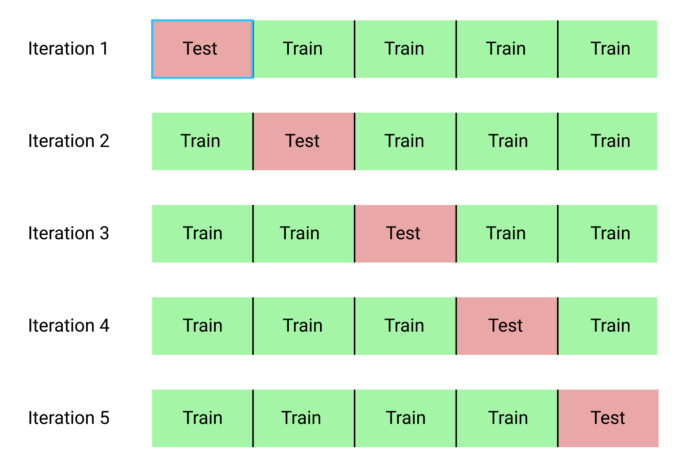

In [ ]:
accuracy = cross_val_score(classifier,X,y, scoring='accuracy',cv=10)
print(accuracy.mean())

0.679076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
input_data = ['37', '29534',' HS-grad', '10', ' Never-married',' Handlers-cleaners',' Not-in-family','0','0','34',' United-States']

input_data_encoded = [-1] * len(input_data)

count = 0

for i, item in enumerate(input_data):
  #verificamos si es digito, si si lo dejamos tal cual
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
      #si no, llamamos al label encoder
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)


In [ ]:
predicted_class = classifier.predict([input_data_encoded])
print(label_encoder[-1].inverse_transform(predicted_class))


[' <=50K']


In [ ]:
df_svm.head(1)

,age,annual_income,education,usr_credit_lvl,marital-status,occupation,relationship,capital_gain,capital_losses,hours_per_week,native_country,income
197,46,56388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,0,0,60,United-States,>50K


##KNN (K- Narest Neighbor)



1.   Calcular la distancia entre el item a clasificar y el resto de items del DS
de entrenamient
2.   Selecciona los k elemenots con menor distancia
3. Raliza una "votación" de aquellos que más se acerquen. Los de una clase que
dominen decidiran el resultado

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). 

Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features 

Posibles caso de uso

 * sistemas de recomendación
 * búsqueda semántica 
 * detección de anomalías.

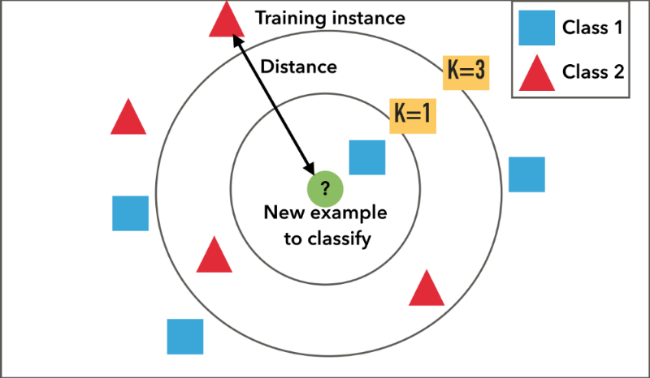